# 1. Зниження розмірності і візуалізація даних

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine, load_digits

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

import seaborn as sns

In [51]:
dafr = pd.read_csv('Hotel Reservations.csv')
dafr.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [52]:
dafr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [53]:
dafr = dafr.drop(['Booking_ID'], axis = 1)

for c_l in list(dafr.select_dtypes(include=['object']).columns):
    if c_l == 'room_type_reserved':
        continue
    dafr[c_l] = LabelEncoder().fit_transform(dafr[c_l])
    
dafr = dafr[[c for c in dafr if c not in ['room_type_reserved']] + ['room_type_reserved']]
dafr.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,room_type_reserved
0,2,0,1,2,0,0,224,2017,10,2,3,0,0,0,65.00,0,1,Room_Type 1
1,2,0,2,3,3,0,5,2018,11,6,4,0,0,0,106.68,1,1,Room_Type 1
2,1,0,2,1,0,0,1,2018,2,28,4,0,0,0,60.00,0,0,Room_Type 1
3,2,0,0,2,0,0,211,2018,5,20,4,0,0,0,100.00,0,0,Room_Type 1
4,2,0,1,1,3,0,48,2018,4,11,4,0,0,0,94.50,0,0,Room_Type 1


In [54]:
dafr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  int64  
 5   required_car_parking_space            36275 non-null  int64  
 6   lead_time                             36275 non-null  int64  
 7   arrival_year                          36275 non-null  int64  
 8   arrival_month                         36275 non-null  int64  
 9   arrival_date                          36275 non-null  int64  
 10  market_segment_type                   36275 non-null  int64  
 11  repeated_guest 

In [41]:
X = dafr.drop(['room_type_reserved'], axis = 1)

# PCA

In [42]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

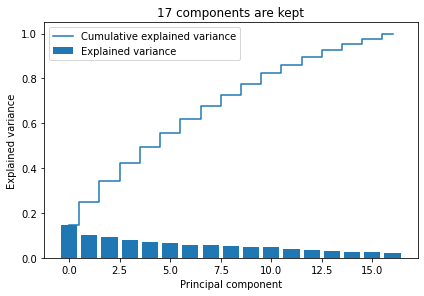

Explained variation per principal component: [0.14780743 0.10249467 0.09302563 0.07844511 0.0706276  0.06647721
 0.05866632 0.05770405 0.05295993 0.04873256 0.04630092 0.0376661
 0.03588289 0.03161819 0.02602151 0.02366658 0.02190331]
Збережена інформація: 0.9999999999999999



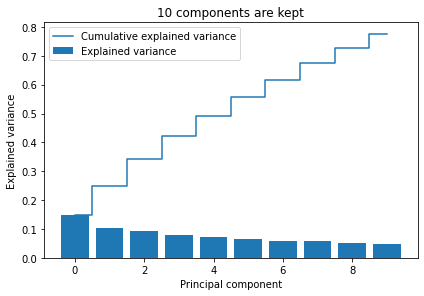

Explained variation per principal component: [0.14780743 0.10249467 0.09302563 0.07844511 0.0706276  0.06647721
 0.05866632 0.05770405 0.05295993 0.04873256]
Збережена інформація: 0.7769405063168909



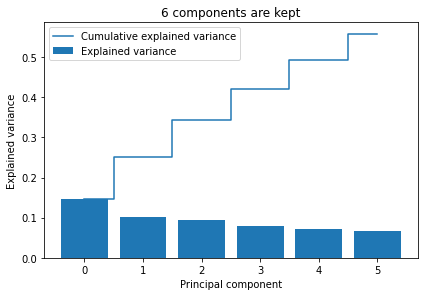

Explained variation per principal component: [0.14780743 0.10249466 0.09302562 0.07844507 0.07062722 0.06647686]
Збережена інформація: 0.5588768701507806



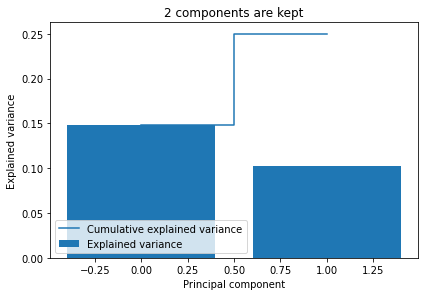

Explained variation per principal component: [0.14780696 0.10248535]
Збережена інформація: 0.2502923107105594



In [45]:
c_comp = [len(exp_var_pca), 10, 6, 2]
 
for c in c_comp:
    pca = PCA(n_components = c)
    X_pca = pca.fit_transform(X_std)
    exp_var_pca = pca.explained_variance_ratio_
    cum_sum_eigenvalues = np.cumsum(exp_var_pca)
    plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
    plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
    plt.ylabel('Explained variance')
    plt.xlabel('Principal component')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.title('%d components are kept' % (c))
    plt.show()
    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
    print('Збережена інформація:', sum(pca.explained_variance_ratio_))
    print()

<AxesSubplot:>

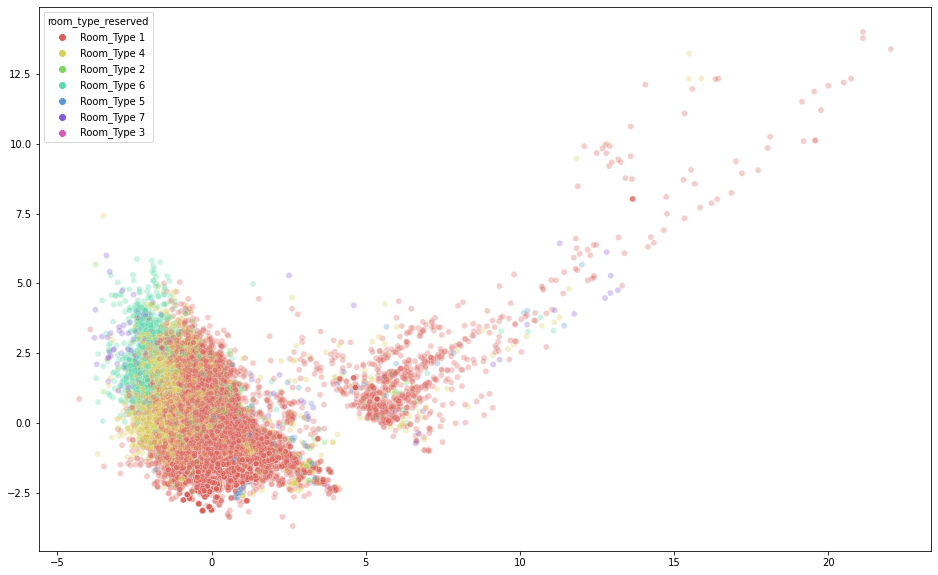

In [61]:
# Для 2-ох компонент

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=X_pca[:,0], y=X_pca[:,1],
    hue=dafr['room_type_reserved'],
    palette=sns.color_palette("hls", 7),
    legend="full",
    alpha=0.3
)

# TSNE

In [47]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(X)

/home/gavrylo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gavrylo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


<AxesSubplot:>

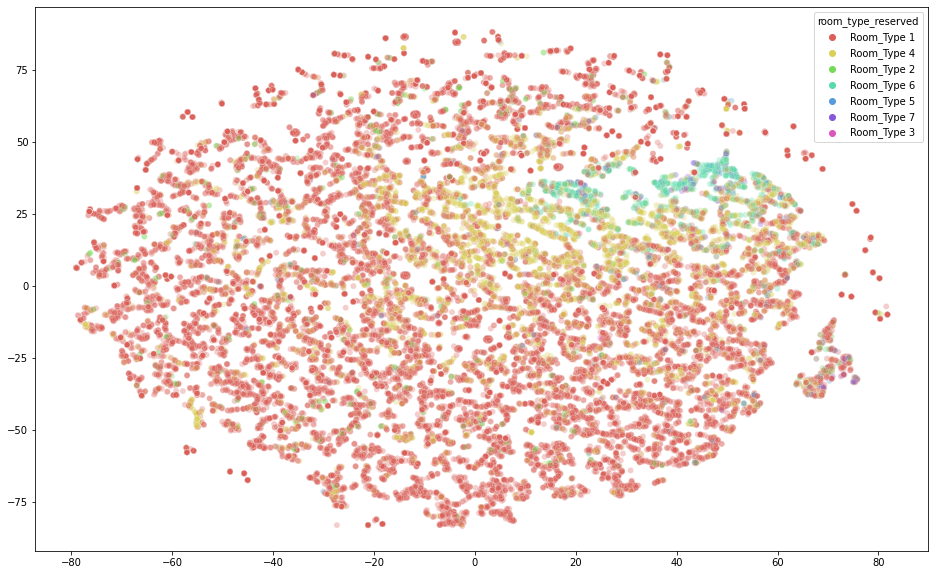

In [58]:
# Для 2-ох компонент

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_result[:,0], y=tsne_result[:,1],
    hue=dafr['room_type_reserved'],
    palette=sns.color_palette("hls", 7),
    legend="full",
    alpha=0.3
)

# PCA & t-SNE

In [63]:
pca_11 = PCA(n_components=11)
pca_result_11 = pca_11.fit_transform(X_std)

print('Cumulative explained variation for 11 principal components: {}'.format(np.sum(pca_11.explained_variance_ratio_)))

Cumulative explained variation for 11 principal components: 0.8232414291360246


In [64]:
tsne = TSNE(n_components=2)
tsne_pca_results = tsne.fit_transform(pca_result_11)

/home/gavrylo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/home/gavrylo/snap/jupyter/common/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


<AxesSubplot:>

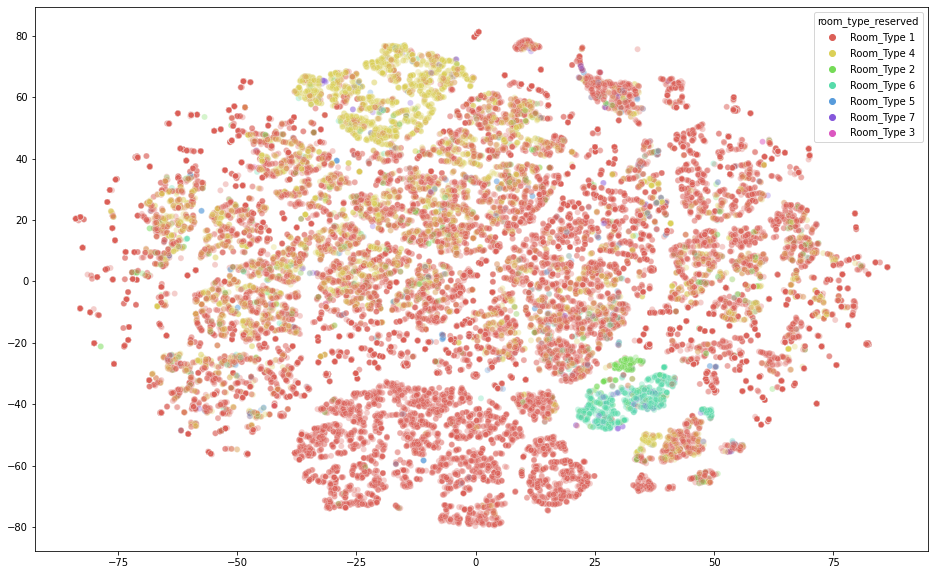

In [65]:
# Для 11-ох компонент

plt.figure(figsize=(16,10))
sns.scatterplot(
    x=tsne_pca_results[:,0], y=tsne_pca_results[:,1],
    hue=dafr['room_type_reserved'],
    palette=sns.color_palette("hls", 7),
    legend="full",
    alpha=0.3
)

# 2. Кластерний аналіз

uint8
(682, 1024, 3)


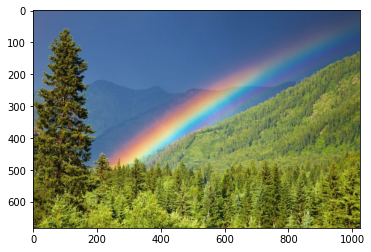

In [54]:
from time import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle

# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread('rainbow.jpeg')
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

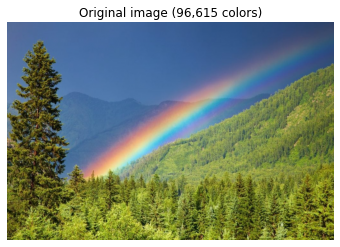

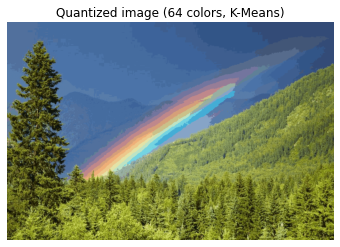

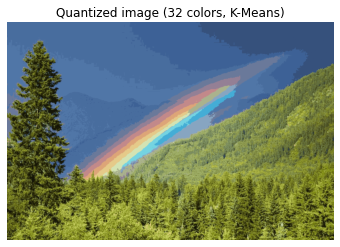

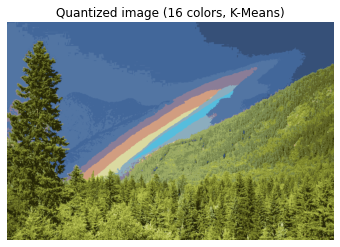

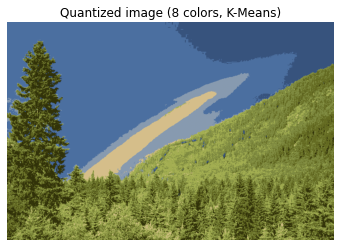

In [55]:
image = np.array(image, dtype=np.float64) / 255

w, h, d = original_shape = tuple(image.shape)
assert d == 3
image_array = np.reshape(image, (w * h, d))


#original image
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Original image (96,615 colors)")
plt.imshow(image)


def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)


n_colors = [64, 32, 16, 8]
i = 2

for col in n_colors:
    #print(f"Fitting model on a small sub-sample of the data: {col} colors")
    t0 = time()
    image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)
    kmeans = KMeans(n_clusters=col, n_init=10 , random_state=0).fit(image_array_sample)
    #print(f"done in {time() - t0:0.3f}s.")

    # Get labels for all points
    #print("Predicting color indices on the full image (k-means)")
    t0 = time()
    labels = kmeans.predict(image_array)
    #print(f"done in {time() - t0:0.3f}s.")


    plt.figure(i)
    plt.clf()
    plt.axis("off")
    plt.title(f"Quantized image ({col} colors, K-Means)")
    plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

    i += 1


# 3. Обробка та класифікація текстових даних

In [20]:
import pandas as pd
import re
import string
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [2]:
#source: https://www.kaggle.com/datasets/venky73/spam-mails-dataset
df = pd.read_csv('spam_ham_dataset.csv')
df.shape

(5171, 4)

In [3]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
Counter(df['label'])

Counter({'ham': 3672, 'spam': 1499})

In [5]:
df.drop(['Unnamed: 0', 'label'], axis = 1, inplace = True)
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [6]:
df['text'].nunique()

4993

In [7]:
df.drop_duplicates(inplace = True)

In [8]:
df.shape

(4993, 2)

In [9]:
df.isnull().sum()

text         0
label_num    0
dtype: int64

In [10]:
stop_words = stopwords.words("english")

In [11]:
stop_words.extend(['subject', 'cc', 'ect', 'hou', 'enron'])

In [12]:
def clean_text(text):
    text = text.lower()
    text = re.sub("@\S+", " ", text)
    text = re.sub("https*\S+", " ", text)
    text = re.sub("#\S+", " ", text)
    text = re.sub("\d", " ", text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s{2,}',' ', text)
    text = re.sub('nbsp', ' ', text)
    text = ' '.join([word for word in text.split(' ') if word not in stop_words])
    return text

In [13]:
DF = df
DF['text'] = DF['text'].apply(clean_text)
DF.head()

,text,label_num
0,methanol meter follow note gave monday prelimi...,0
1,hpl nom january see attached file hplnol xls h...,0
2,neon retreat ho ho ho around wonderful time ye...,0
3,photoshop windows office cheap main trending a...,1
4,indian springs deal book teco pvr revenue unde...,0


In [14]:
def visualize(label):
    words = ''
    for msg in DF[DF['label_num']==label]['text']:
        words+=msg + ' '
    wordcloud = WordCloud(width=600,height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

### Spam

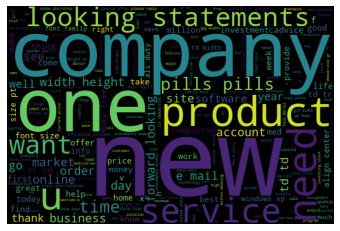

In [15]:
visualize(1)

### Ham

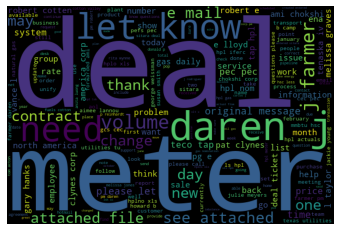

In [16]:
visualize(0)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(DF['text'], DF['label_num'], test_size = 0.20, random_state = 0)

In [21]:
tfidf_vectorizer = TfidfVectorizer(max_df=500, min_df=10)

tfidf_train = tfidf_vectorizer.fit_transform(X_train)
tfidf_test =  tfidf_vectorizer.transform(X_test)

clf = LogisticRegression().fit(tfidf_train, y_train)

predicted = clf.predict(tfidf_test)
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       722
           1       0.97      0.91      0.94       277

    accuracy                           0.97       999
   macro avg       0.97      0.95      0.96       999
weighted avg       0.97      0.97      0.97       999

